# SEIR

This notebook is just for quickly rolling out SEIR models implemented with `scipy`'s ODE solver. This will let us prototype new interactions if we want to and understand the dynamics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from dataclasses import dataclass

from typing import List

# plt.rc("text", usetex=True)
plt.rc("font", size=15, family="serif")
%matplotlib inline

In [2]:
N = 100.  # total population. arbitrary

@dataclass
class SEIR:
    # https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model
    alpha: float = 5e-3  # note: this is a complete guess
    beta: float = 0.5
    gamma: float = 0.035
    mu: float = 5e-3
        
    @property
    def names(self) -> List[str]:
        return ["S", "E", "I", "R"]

    def derivs(self, time: float, variables: np.ndarray):
        S, E, I, R = variables
        return np.array([
            self.mu * (N - S) - self.beta * I * S / N,
            self.beta * I * S / N - (self.mu + self.alpha) * E,
            self.alpha * E -  (self.gamma + self.mu) * I,
            self.gamma * I - self.mu * R,
        ])

In [3]:
model = SEIR()
start = [N * 0.99, 0.01, 0, 0]  # all in S
t_span = (0, N * 10)
result = solve_ivp(model.derivs, t_span, start)

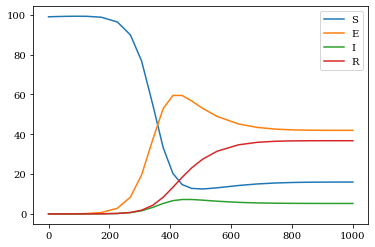

In [4]:
t = result.t
variables = result.y

for v, name in zip(variables, model.names):
    plt.plot(t, v, label=name)
plt.legend()

In [5]:
# https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology
# #Vaccination_of_non-newborns
@dataclass
class SEIRV:
    # With a vaccination term
    alpha: float = 5e-3  # note: this is a complete guess
    beta: float = 0.5
    gamma: float = 0.035
    mu: float = 5e-3
    rho: float = 1e-4
        
    @property
    def names(self) -> List[str]:
        return ["S", "E", "I", "R", "V"]

    def derivs(self, time: float, variables: np.ndarray):
        S, E, I, R, V = variables
        P = 1 - (1 + self.rho / self.mu) / (N / 10.)  # last term is R_0
        return np.array([
            self.mu * (N - S) - self.beta * I * S / N - self.rho * S,
            self.beta * I * S / N - (self.mu + self.alpha) * E,
            self.alpha * E -  (self.gamma + self.mu) * I,
            self.gamma * I - self.mu * R,
            self.mu * (N * P - V) + self.rho * S,
        ])

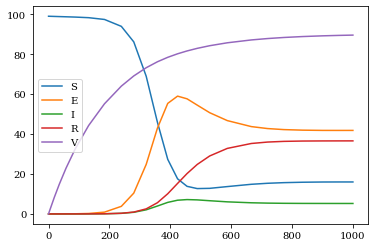

In [6]:
model2 = SEIRV()
start = [N * 0.99, 0.01, 0, 0, 0]  # all in S and a little in E
t_span = (0, N * 10)
result = solve_ivp(model2.derivs, t_span, start)

t = result.t
variables = result.y

for v, name in zip(variables, model2.names):
    plt.plot(t, v, label=name)
plt.legend()